In [1]:
from sklearn.datasets import fetch_openml


In [2]:
mnist=fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
len(mnist['data'][0])

784

In [5]:
import matplotlib.pyplot as  plt

In [6]:
img_1=mnist['data'][0]

In [7]:
img_1=img_1.reshape(28,28)


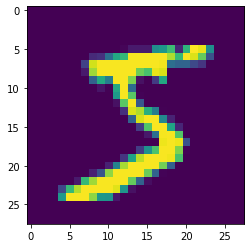

In [8]:
plt.imshow(img_1)

In [9]:
import os

if not os.path.isdir('/digits'):
    os.mkdir('/digits')
    print("created")

mnist['data']

In [12]:
X,y=mnist['data'],mnist['target']

In [13]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [14]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

## SGDClassifier

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd=SGDClassifier(random_state=42)

In [17]:
sgd.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd.predict(X_train[:5])

array([ True, False, False, False, False])

In [19]:
y_train[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [20]:
from sklearn.model_selection import StratifiedKFold

In [21]:
stratifiedKFold=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

In [22]:
sgd_clf=SGDClassifier(random_state=42)

In [23]:
from sklearn.base import clone

In [24]:
for train_index,test_index in stratifiedKFold.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    Y_train_folds=y_train_5[train_index]
    X_test_folds=X_train[test_index]
    y_test_folds=y_train_5[test_index]
    clone_clf.fit(X_train_folds,Y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print(n_correct/len(y_test_folds))
    
    

0.9669
0.91625
0.96785


In [25]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

In [26]:
cvs

array([0.95035, 0.96035, 0.9604 ])

In [27]:
from sklearn.base import BaseEstimator

In [28]:
import  numpy as np

In [29]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [30]:
np.zeros((len(X),1),dtype=bool)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [31]:
never5Classifier=Never5Classifier()

In [32]:
cvs_n5=cross_val_score(never5Classifier,X_train,y_train_5,cv=3,scoring="accuracy")

In [33]:
cvs_n5

array([0.91125, 0.90855, 0.90915])

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_pred_cvp=cross_val_predict(sgd_clf,X_train,y_train_5
                         ,cv=3)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_train_5,y_pred_cvp)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
cvs_score=cross_val_predict(sgd_clf,X_train,y_train_5,method="decision_function",cv=3)

In [40]:
from sklearn.metrics import precision_recall_curve

In [41]:
precision,recall,threshold=precision_recall_curve(y_train_5,cvs_score)

In [54]:
threshold[:5]

array([-106527.45300471, -105763.22240074, -105406.2965229 ,
       -104799.72132607, -104613.21489858])

In [102]:
np.arange(0.0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

<Figure size 432x288 with 0 Axes>

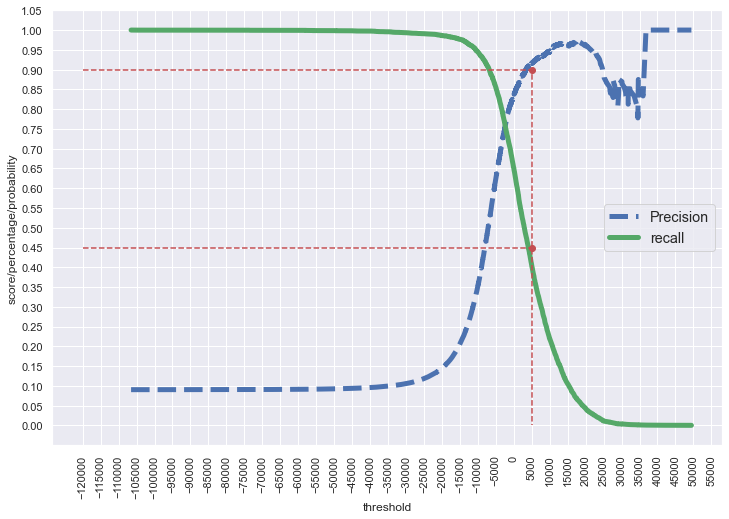

In [150]:
plt.clf()
plt.figure(figsize=(12,8))
plt.plot(threshold,precision[:-1],'b--',label='Precision',linewidth=5)
plt.plot(threshold,recall[:-1],'g-',label="recall",linewidth=5)
plt.plot([5000,5000],[0.9,0.45],'ro')
plt.xticks([i for i in range(-120000,60000,5000)],rotation=90)
plt.yticks([i for i in np.arange(0.0,1.1,0.05)])
plt.plot([-120000,5000,5000],[0.9,0.9,0],'r--')
plt.plot([-120000,5000],[0.45,0.45],'r--')
plt.xlabel("threshold")
plt.ylabel("score/percentage/probability")
#-,5000
#,0.45,0.45
plt.legend(loc='center right',fontsize="large")

plt.savefig("PrecisionRecallThreshold.png")
plt.show()


array([0.00000000e+00, 1.84467810e-04, 3.68935621e-04, ...,
       9.99815532e-01, 9.99815532e-01, 1.00000000e+00])

In [42]:
def plot_precision_and_recall_vs_threshold(precisions,recalls,threshold):
    plt.plot(threshold,precision[:-1],'b--',label="precision")
    plt.plot(threshold,recall[:-1],'g-',label="recall")
    plt.xlim([-50000,50000])
    

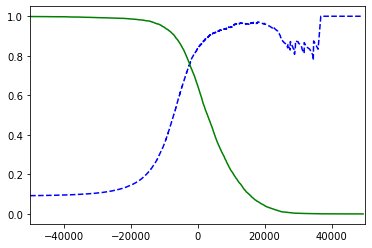

In [43]:
plot_precision_and_recall_vs_threshold(precision,recall,threshold)

In [121]:
threshold[np.argmax(precision>=0.9)]

3370.0194991439557

In [114]:
threshold[57075]

3370.0194991439557

In [123]:
threshold_90=threshold[np.argmax(precision>=0.90)]

In [124]:
threshold_90

3370.0194991439557

In [125]:
from sklearn.metrics import precision_score,recall_score

In [126]:
y_pre=cvs_score>=threshold_90

In [127]:
precision_score(y_train_5,y_pre)

0.9000345901072293

In [128]:
recall_score(y_train_5,y_pre)

0.4799852425751706

In [133]:
import seaborn as sns
sns.set()

<Figure size 432x288 with 0 Axes>

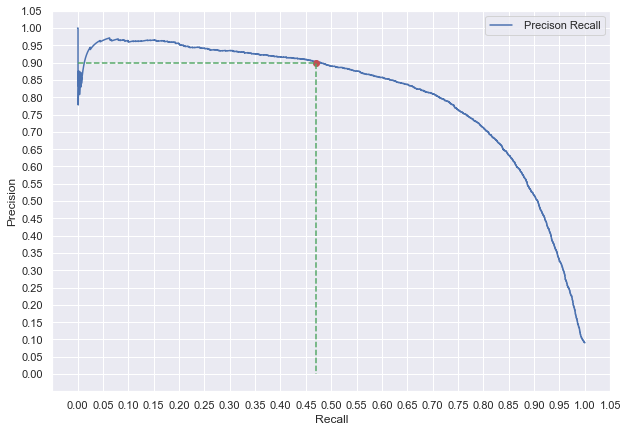

In [196]:
plt.clf()
plt.figure(figsize=(10,7))
plt.plot(recall,precision,label=" Precison Recall")

plt.xticks([i for i in np.arange(0.0,1.1,0.05)])
plt.yticks([i for i in np.arange(0.0,1.1,0.05)])
plt.plot([0.47],[0.9],'ro')
plt.plot([0,0.47,0.47],[0.9,0.9,0],'g--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.Text("Precison Recall")
plt.legend()
plt.savefig("PrecisionRecall.png")

In [152]:
from sklearn.metrics import roc_curve

In [165]:
fpr,tpr,threshold=roc_curve(y_train_5,cvs_score)

Text(0.5, 0, 'False +ve Rate [1-specificity] (1-(true -ve rate))')

<Figure size 432x288 with 0 Axes>

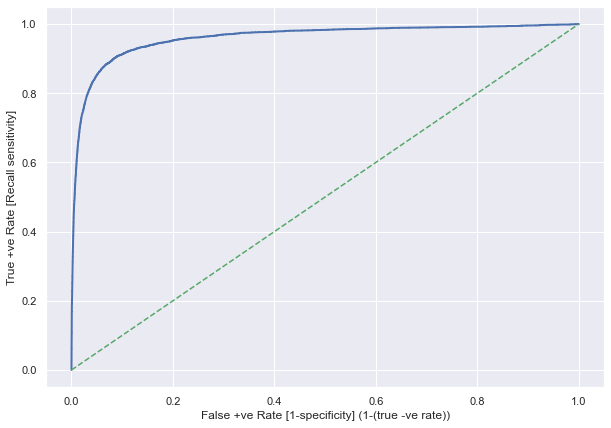

In [172]:
plt.clf()
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'g--')
plt.ylabel("True +ve Rate [Recall sensitivity]")
plt.xlabel("False +ve Rate [1-specificity] (1-(true -ve rate))")

In [173]:
from sklearn.metrics import roc_auc_score

In [174]:
auc=roc_auc_score(y_train_5,cvs_score)

In [176]:
print("Area under the curve",auc)

Area under the curve 0.9604938554008616


In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rfc=RandomForestClassifier(random_state=42)

In [180]:
y_rfc_prob=cross_val_predict(rfc,X_train,y_train_5,cv=3,method="predict_proba")

In [181]:
rfc_score=y_rfc_prob[:,1]

In [182]:
fpr_f,tpr_f,threshold_f=roc_curve(y_train_5,rfc_score)

<Figure size 432x288 with 0 Axes>

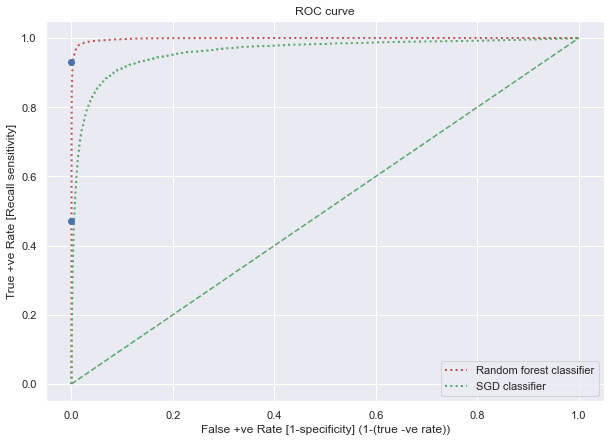

In [194]:
plt.clf()
plt.figure(figsize=(10,7))
plt.plot(fpr_f,tpr_f,'r:',linewidth=2,label="Random forest classifier")
plt.plot(fpr,tpr,'g:',linewidth=2,label="SGD classifier")
plt.plot([0,1],[0,1],'g--')
plt.plot([0,0],[0.47,0.93],'bo')
plt.ylabel("True +ve Rate [Recall sensitivity]")
plt.title("ROC curve")
plt.legend()
plt.xlabel("False +ve Rate [1-specificity] (1-(true -ve rate))")
plt.savefig("ROC curve for SGD and Random Forest")

In [198]:
precision_f,recall_f,threshold_f=precision_recall_curve(y_train_5,rfc_score)

<Figure size 432x288 with 0 Axes>

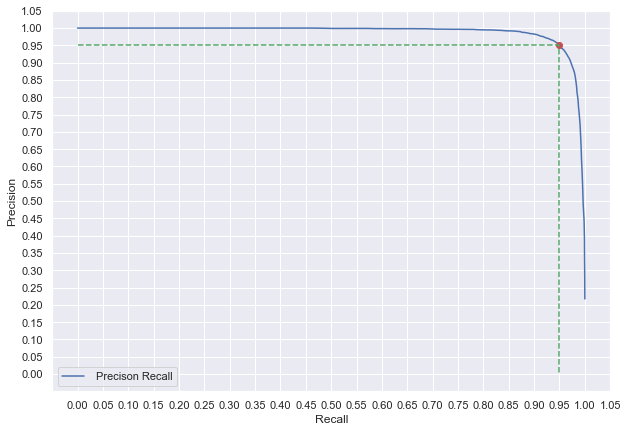

In [200]:
plt.clf()
plt.figure(figsize=(10,7))
plt.plot(recall_f,precision_f,label=" Precison Recall")

plt.xticks([i for i in np.arange(0.0,1.1,0.05)])
plt.yticks([i for i in np.arange(0.0,1.1,0.05)])
plt.plot([0.95],[0.95],'ro')
plt.plot([0,0.95,0.95],[0.95,0.95,0],'g--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.Text("Precison Recall")
plt.legend()
plt.savefig("PrecisionRecall.png")

In [201]:
roc_auc_score(y_train_5,rfc_score)

0.9983436731328145

In [203]:
rfc.fit(X_train,y_train_5)

RandomForestClassifier(random_state=42)

In [ ]:
y_predict_5=rfc.predict(X_train)

In [ ]:
confusion_matrix